In [1]:
"""
Ce fichier analyse comment l'evolutin de la distance meandre d'une valeur assez 
grandre a une valuer tres petite influence la frequence de raisonnance

Dans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree
"""

"\nCe fichier analyse comment l'evolutin de la distance meandre d'une valeur assez \ngrandre a une valuer tres petite influence la frequence de raisonnance\n\nDans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree\n"

In [2]:
from utils.ifa_meander_project_v2.geometry import *
from utils.ifa_meander_project_v2.meshing import *
from utils.ifa_meander_project_v2.frequency import *
from utils.ifa_meander_project_v2.simulation import *

In [3]:
fC      = 868e6  # fréquence centrale en Hz
delta_f = 4e6  # écart entre les échantillons en Hz
print(f"delta_f = {delta_f/1e6:.2f} MHz")
nPoints = 31     # nombre d'échantillons

fLow, fHigh, frequencies = calc_frequencies(fC, delta_f, nPoints)
print(f"fLow = {fLow/1e6:.2f} MHz, fHigh = {fHigh/1e6:.2f} MHz, nPoints = {nPoints}")

delta_f = 4.00 MHz
fLow = 808.00 MHz, fHigh = 928.00 MHz, nPoints = 31


In [4]:
mesh_name = "ifa_meander_anlyse_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_anlyse_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [5]:
a = 15 / 1000  # Largeur
b = 30 / 1000  # Hauteur

terminal_a = 50 / 1000
terminal_b = 30 / 1000
x_t = np.array([-terminal_a, 0, 0, -terminal_a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# On fixe le short feed et la largur de piste
distance_meandre = 1.5 / 1000     # Valeur choisie en fonction du resulat de analyse_dist_meandre.ipynb
feed          = 15 / 1000         # Valuer Positionné a la moitié du ground plane
feed_point    = [0, feed, 0]      # On alimente au short feed

In [6]:
largeur_piste_list = np.linspace(0.5 / 1000, 2 * distance_meandre - 0.1 / 1000, 10)
print(f"Min distance: {largeur_piste_list[-1]*1000:.2f} mm")
print(f"Max distance: {largeur_piste_list[0]*1000:.2f} mm")

np.save('data/largeur_piste_list.npy', largeur_piste_list)

Min distance: 2.90 mm
Max distance: 0.50 mm


"""
La distance meandre doit etre toujours suprieur la moitié de la largueur de piste 
"""
if distance_meandre < largeur_piste / 2:
    raise ValueError(f"La distance meandre ({distance_meandre*1000:.2f} mm) doit être supérieure à la moitié de la largeur de piste ({largeur_piste*1000/2:.2f} mm)")

if distance_meandre > a - largeur_piste:
        raise ValueError(f"La distance meandre ({distance_meandre*1000:.2f} mm) doit être inférieure à la largeur du plan moins la largeur de piste ({(a-largeur_piste)*1000:.2f} mm)")


In [7]:
def creation_ifa(largeur, hauteur, width, dist_meandre, x_t, y_t, save_mesh_folder, mesh_name, mesh_size=2.25/1000):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width                    # La largeur de la piste est la meme partout
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

In [ ]:
iteration = 1
N_list = []
frequences_resonance = []
for largeur_piste in largeur_piste_list:
    try:
        print(f"\nIteration N°{iteration}")
        print(f"distance meandres {distance_meandre * 1000} mm")
        print(f"Largeur de piste ifa {largeur_piste * 1000} mm")
        N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, x_t, y_t, save_mesh_folder, mesh_name)
        print(f"Number of meanders {N_list_elem}")
        print(f"New distance meandres {new_distance_meandre_elem * 1000} mm")
        N_list.append(N_list_elem)
        frequence_resonance = analysis(frequencies, ifa_meander_mat, feed_point)
        frequences_resonance.append(frequence_resonance)

        iteration += 1
    except ValueError as e:
        print(f"Error: {e}")

np.save(f'data/analyse_largeur_piste/frequences_resonance.npy', frequences_resonance)
np.save(f'data/analyse_largeur_piste/N_list.npy', N_list)


Iteration N°1
distance meandres 1.5 mm
Largeur de piste ifa 0.5 mm
Number of meanders 7
New distance meandres 1.642857142857143 mm
Simulation 1/31 | f = 808.00 MHz | S11 = -1.35 dB
Simulation 2/31 | f = 812.00 MHz | S11 = -1.15 dB
Simulation 3/31 | f = 816.00 MHz | S11 = -1.00 dB
Simulation 4/31 | f = 820.00 MHz | S11 = -0.87 dB
Simulation 5/31 | f = 824.00 MHz | S11 = -0.77 dB
Simulation 6/31 | f = 828.00 MHz | S11 = -0.68 dB
Simulation 7/31 | f = 832.00 MHz | S11 = -0.61 dB
Simulation 8/31 | f = 836.00 MHz | S11 = -0.55 dB
Simulation 9/31 | f = 840.00 MHz | S11 = -0.49 dB
Simulation 10/31 | f = 844.00 MHz | S11 = -0.45 dB
Simulation 11/31 | f = 848.00 MHz | S11 = -0.41 dB
Simulation 12/31 | f = 852.00 MHz | S11 = -0.38 dB
Simulation 13/31 | f = 856.00 MHz | S11 = -0.35 dB
Simulation 14/31 | f = 860.00 MHz | S11 = -0.32 dB
Simulation 15/31 | f = 864.00 MHz | S11 = -0.30 dB
Simulation 16/31 | f = 868.00 MHz | S11 = -0.28 dB
Simulation 17/31 | f = 872.00 MHz | S11 = -0.26 dB
Simulation

ZeroDivisionError: float division by zero

In [ ]:
# Charger et afficher la liste largeur_piste_list.npy
loaded_largeur_piste_list = np.load('data/analyse_largeur_piste/largeur_piste_list.npy')
# print("\nContenu de loaded_largeur_piste_list.npy :", loaded_largeur_piste_list * 1000)

# Charger et afficher la liste N_list.npy
loaded_frequences_resonance = np.load('data/analyse_largeur_piste/frequences_resonance.npy')
print("\nContenu de frequences_resonance.npy :", loaded_frequences_resonance * 1e-6)

# Charger et afficher la liste N_list.npy
loaded_N_list = np.load('data/analyse_largeur_piste/N_list.npy')
print("\nContenu de N_list.npy :", loaded_N_list)


Contenu de frequences_resonance.npy : [808. 856. 928. 928. 928. 928. 928. 928. 928. 928.]

Contenu de N_list.npy : [7 6 5 5 4 4 4 3 3 3]


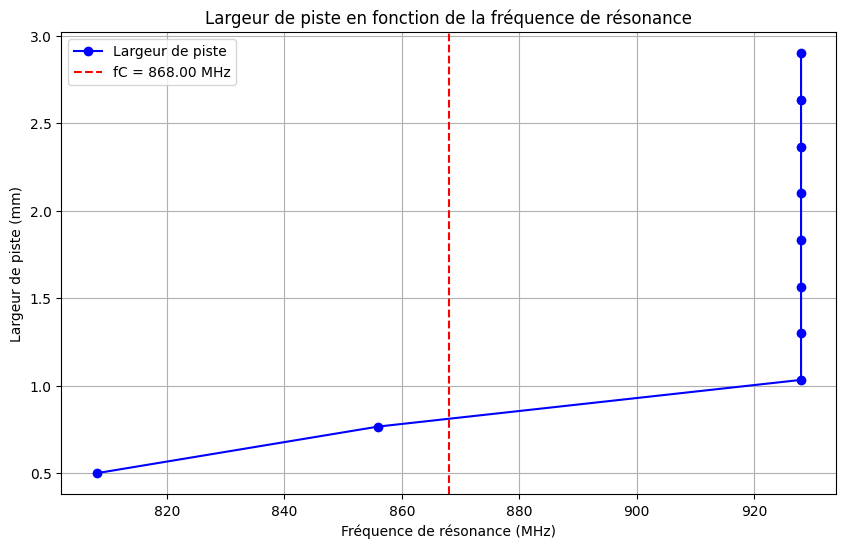

In [ ]:
import matplotlib.pyplot as plt

# Conversion des fréquences de résonance en MHz
frequences_resonance_mhz = np.array(frequences_resonance) * 1e-6
largeur_piste_count_list_mm = np.array(loaded_largeur_piste_list) * 1000  # Conversion en mm

# Tracé inversé
plt.figure(figsize=(10, 6))
plt.plot(frequences_resonance_mhz, largeur_piste_count_list_mm, marker='o', linestyle='-', color='b', label='Largeur de piste')

# Ajouter une ligne horizontale pour fC
plt.axvline(x=fC * 1e-6, color='r', linestyle='--', label=f'fC = {fC * 1e-6:.2f} MHz')

plt.ylabel('Largeur de piste (mm)')
plt.xlabel('Fréquence de résonance (MHz)')
plt.title('Largeur de piste en fonction de la fréquence de résonance')
plt.legend()
plt.grid(True)
plt.show()


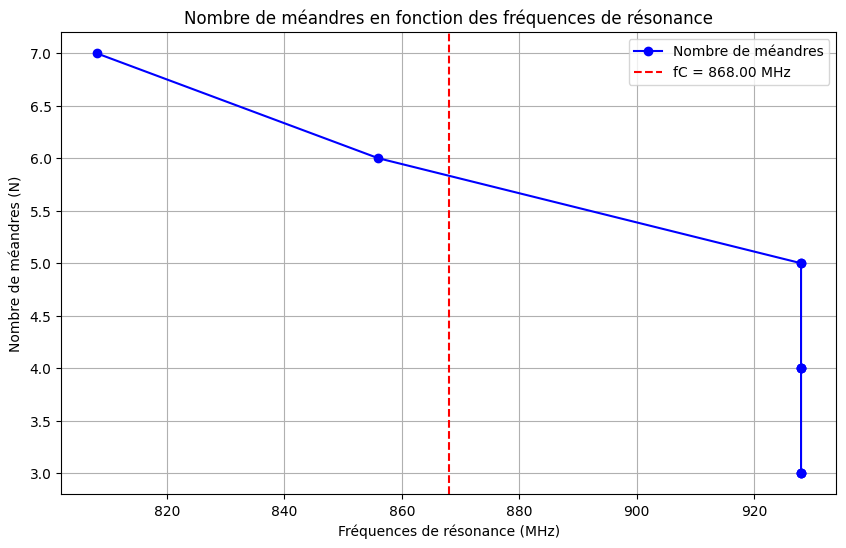

In [ ]:
# Conversion des fréquences de résonance en MHz
frequences_resonance_mhz = loaded_frequences_resonance * 1e-6
fC_mhz = fC * 1e-6

plt.figure(figsize=(10, 6))
plt.plot(frequences_resonance_mhz, loaded_N_list, marker='o', linestyle='-', color='b', label='Nombre de méandres')
plt.axvline(x=fC_mhz, color='r', linestyle='--', label=f'fC = {fC_mhz:.2f} MHz')

# Si nous avons une valeur à fC_mhz, l'afficher
index_fC = np.where(frequences_resonance_mhz == fC_mhz)[0]
if len(index_fC) > 0:
    N_at_fC = loaded_N_list[index_fC[0]]
    plt.scatter([fC_mhz], [N_at_fC], color='g', label=f'N à fC = {N_at_fC}')

plt.xlabel('Fréquences de résonance (MHz)')
plt.ylabel('Nombre de méandres (N)')
plt.title('Nombre de méandres en fonction des fréquences de résonance')
plt.legend()
plt.grid(True)
plt.show()